<a href="https://colab.research.google.com/github/Ekansh0801/90-DAYS-OF-MACHINE-LEARNING/blob/main/DAY_37.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hyperparameter Tuning

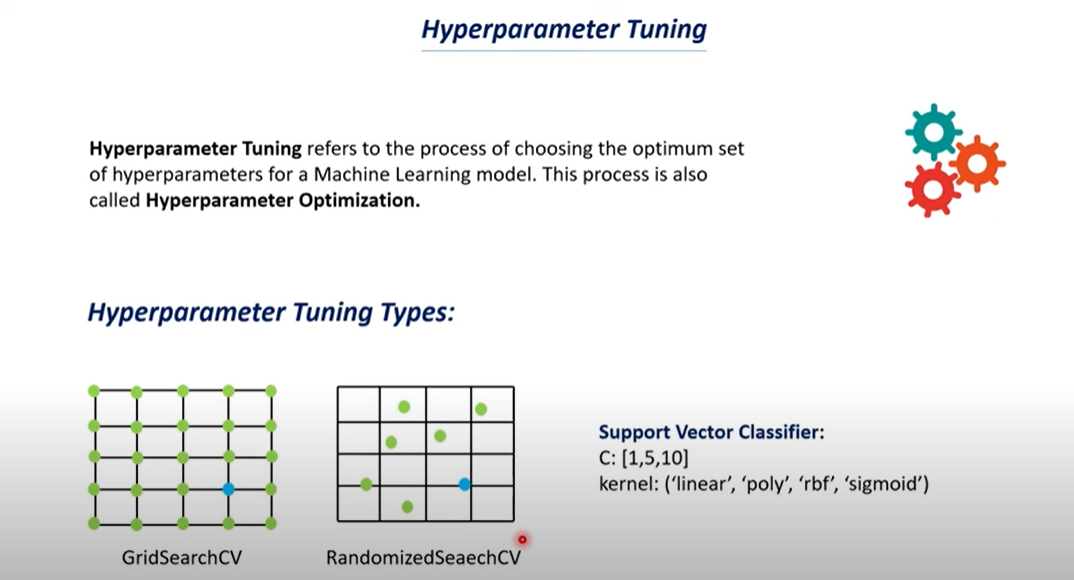

## 1. GridSearchCV
## 2. RandomizedSearchCV

In [2]:
# importing the dependencies
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [3]:
# importing the dataset
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [4]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [5]:
# loading the data into dataframe
data_frame = pd.DataFrame(breast_cancer_dataset.data,columns = breast_cancer_dataset.feature_names)

In [6]:
# print first 5 rows of dataset
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# adding the target column to dataset
data_frame['target'] = breast_cancer_dataset.target

In [8]:
# number of rows and columns
data_frame.shape

(569, 31)

In [9]:
# checking for null values
data_frame.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [10]:
# checking for distribution of target variable
data_frame['target'].value_counts()

,count
target,
1,357
0,212


### 1 --> Benign
### 0 --> Malignant

In [11]:
#seperating features and target

X = data_frame.drop(columns='target',axis=1)
Y = data_frame['target']

In [12]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [13]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64


In [14]:
X = np.asarray(X)
Y = np.asarray(Y)

**GridSearchCV**

### GridSearchCV is used for finding best hyperparameters for our model

In [15]:
# loading the SVC model
model = SVC()

In [16]:
# hyperparameters
parameters = {
    'kernel': ['linear','poly','rbf','sigmoid'],
    'C':[1, 5, 10, 20]
}

In [18]:
# grid search
classifier = GridSearchCV(model,parameters,cv = 5)

In [19]:
# fitting the data into model
classifier.fit(X,Y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [21]:
classifier.cv_results_

{'mean_fit_time': array([1.42633729e+00, 4.12054062e-03, 4.75783348e-03, 1.50537968e-02,
        3.16193027e+00, 4.11920547e-03, 4.27775383e-03, 2.02493191e-02,
        5.47059250e+00, 4.55150604e-03, 4.18229103e-03, 2.20086575e-02,
        7.75368257e+00, 4.86178398e-03, 4.52961922e-03, 1.42310619e-02]),
 'std_fit_time': array([5.14792917e-01, 1.24922909e-04, 1.58719630e-04, 9.52460630e-04,
        9.12015607e-01, 2.41122949e-04, 1.95889115e-04, 5.74769693e-03,
        1.88194509e+00, 1.54012541e-04, 1.33081603e-04, 1.00066126e-03,
        2.50256037e+00, 2.70436184e-04, 2.08615608e-04, 1.24046429e-03]),
 'mean_score_time': array([0.0014441 , 0.00135264, 0.0020689 , 0.00406647, 0.00135298,
        0.00125937, 0.00173149, 0.00538316, 0.0015614 , 0.00123558,
        0.00164924, 0.007025  , 0.00140514, 0.00135164, 0.00176854,
        0.00382624]),
 'std_score_time': array([6.08162755e-05, 3.52200331e-05, 1.00030912e-04, 1.00028912e-04,
        2.53585767e-04, 3.37587238e-05, 3.46062247e-

In [25]:
# best results

best_parameters = classifier.best_params_
print(best_parameters)

{'C': 10, 'kernel': 'linear'}


In [26]:
# highest accuracy

highest_accuracy = classifier.best_score_
print(highest_accuracy)

0.9525694767893185


In [22]:
results = pd.DataFrame(classifier.cv_results_)

In [23]:
print(results)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0        1.426337      0.514793         0.001444        0.000061        1   
1        0.004121      0.000125         0.001353        0.000035        1   
2        0.004758      0.000159         0.002069        0.000100        1   
3        0.015054      0.000952         0.004066        0.000100        1   
4        3.161930      0.912016         0.001353        0.000254        5   
5        0.004119      0.000241         0.001259        0.000034        5   
6        0.004278      0.000196         0.001731        0.000035        5   
7        0.020249      0.005748         0.005383        0.001006        5   
8        5.470592      1.881945         0.001561        0.000324       10   
9        0.004552      0.000154         0.001236        0.000044       10   
10       0.004182      0.000133         0.001649        0.000071       10   
11       0.022009      0.001001         0.007025        0.001222       10   

In [28]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.426337,0.514793,0.001444,0.000061,1,linear,"{'C': 1, 'kernel': 'linear'}",0.947368,0.929825,0.973684,0.921053,0.955752,0.945536,0.018689,4
1,0.004121,0.000125,0.001353,0.000035,1,poly,"{'C': 1, 'kernel': 'poly'}",0.842105,0.885965,0.929825,0.947368,0.938053,0.908663,0.039382,12
2,0.004758,0.000159,0.002069,0.000100,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.850877,0.894737,0.929825,0.947368,0.938053,0.912172,0.035444,11
3,0.015054,0.000952,0.004066,0.000100,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.543860,0.456140,0.464912,0.385965,0.451327,0.460441,0.050253,13
4,3.161930,0.912016,0.001353,0.000254,5,linear,"{'C': 5, 'kernel': 'linear'}",0.947368,0.938596,0.973684,0.929825,0.964602,0.950815,0.016216,2


In [32]:
grid_search_result = results[['param_C','param_kernel','mean_test_score']]

In [33]:
grid_search_result

,param_C,param_kernel,mean_test_score
0,1,linear,0.945536
1,1,poly,0.908663
2,1,rbf,0.912172
3,1,sigmoid,0.460441
4,5,linear,0.950815
5,5,poly,0.922729
6,5,rbf,0.931501
7,5,sigmoid,0.411178
8,10,linear,0.952569
9,10,poly,0.920975


### Higest Accuracy : 95.2%
### Best parameters = {'C':10,'kernel':'linear'}

**RandomizedSearchCV**

In [34]:
# loading the SVC model
model = SVC()

In [35]:
# hyperparameters
parameters = {
    'kernel': ['linear','poly','rbf','sigmoid'],
    'C':[1, 5, 10, 20]
}

In [36]:
# randomizedsearchCV
classifier = RandomizedSearchCV(model,parameters,cv=5)

In [41]:
classifier.fit(X,Y)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1, 5, 10, 20],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [43]:
classifier.cv_results_

{'mean_fit_time': array([4.57158089e-03, 1.39400482e-02, 4.83689308e-03, 7.90693030e+00,
        1.50816917e-02, 6.68129921e-03, 3.88121605e-03, 1.39520645e-02,
        4.64987755e-03, 4.71453667e-03]),
 'std_fit_time': array([1.59250519e-04, 7.44534956e-04, 6.31645480e-04, 2.79418453e+00,
        3.55647625e-04, 1.53956425e-03, 2.03472232e-04, 6.25895215e-04,
        3.42890912e-04, 3.57539083e-04]),
 'mean_score_time': array([0.00183434, 0.00372806, 0.00153441, 0.00158334, 0.00420518,
        0.0018611 , 0.00129361, 0.00369315, 0.00208344, 0.00193129]),
 'std_score_time': array([9.63474700e-05, 1.56092088e-04, 1.81011330e-04, 3.73420644e-04,
        2.88320738e-04, 4.66097700e-04, 2.10459738e-05, 1.20607606e-04,
        4.96259979e-04, 4.65766047e-04]),
 'param_kernel': masked_array(data=['rbf', 'sigmoid', 'poly', 'linear', 'sigmoid', 'poly',
                    'poly', 'sigmoid', 'rbf', 'rbf'],
              mask=[False, False, False, False, False, False, False, False,
             

In [44]:
# best results

best_parameters = classifier.best_params_
print(best_parameters)

{'kernel': 'linear', 'C': 20}


In [45]:
# highest accuracy

highest_accuracy = classifier.best_score_
print(highest_accuracy)

0.9490607048594939


In [46]:
results = pd.DataFrame(classifier.cv_results_)

print(results)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_kernel  \
0       0.004572      0.000159         0.001834        0.000096          rbf   
1       0.013940      0.000745         0.003728        0.000156      sigmoid   
2       0.004837      0.000632         0.001534        0.000181         poly   
3       7.906930      2.794185         0.001583        0.000373       linear   
4       0.015082      0.000356         0.004205        0.000288      sigmoid   
5       0.006681      0.001540         0.001861        0.000466         poly   
6       0.003881      0.000203         0.001294        0.000021         poly   
7       0.013952      0.000626         0.003693        0.000121      sigmoid   
8       0.004650      0.000343         0.002083        0.000496          rbf   
9       0.004715      0.000358         0.001931        0.000466          rbf   

   param_C                          params  split0_test_score  \
0       10      {'kernel': 'rbf', 'C': 10}           0

In [47]:
randomized_search_result = results[['param_C','param_kernel','mean_test_score']]

In [48]:
randomized_search_result

,param_C,param_kernel,mean_test_score
0,10,rbf,0.922714
1,10,sigmoid,0.402391
2,5,poly,0.922729
3,20,linear,0.949061
4,1,sigmoid,0.460441
5,20,poly,0.919221
6,1,poly,0.908663
7,5,sigmoid,0.411178
8,5,rbf,0.931501
9,20,rbf,0.920944


### Higest Accuracy : 94.9%
### Best parameters = {'C':20,'kernel':'linear'}